In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



In [2]:
# Read the data in dataframe
raw_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Create copy of original data to work with, so that we can refrence original data in future
df = raw_data.copy()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
df.isnull().values.any() # If there are any null values in data set

False

## Study the data distribution in each attribute, share your findings

### We will go through each attribute one by one 

### Data distribution of Age

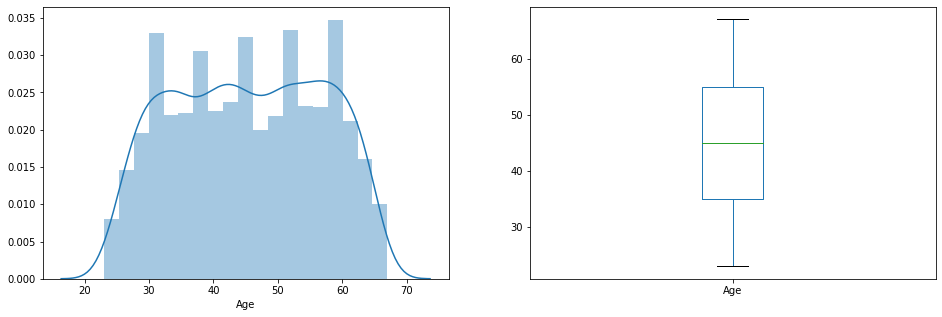

In [5]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))

Looks like customers are almost evenly distributed amongst all age groups.



### Data distribution of Experience

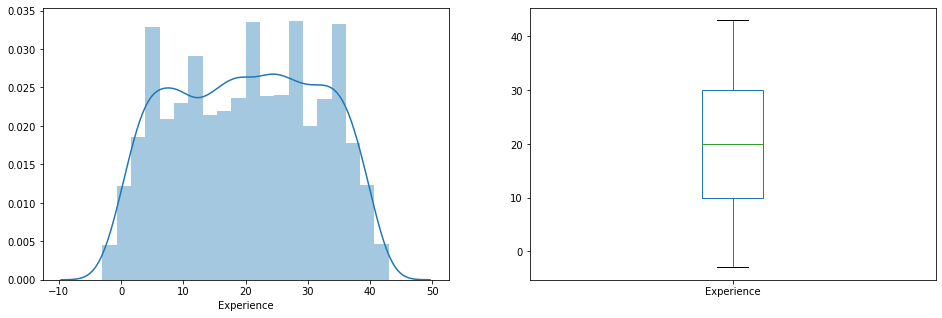

In [6]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Experience'])

plt.subplot(122)
df['Experience'].plot.box(figsize=(16,5))

Looks like customers are almost evenly distributed amongst all Experience  Levels.

### Data distribution of Income 

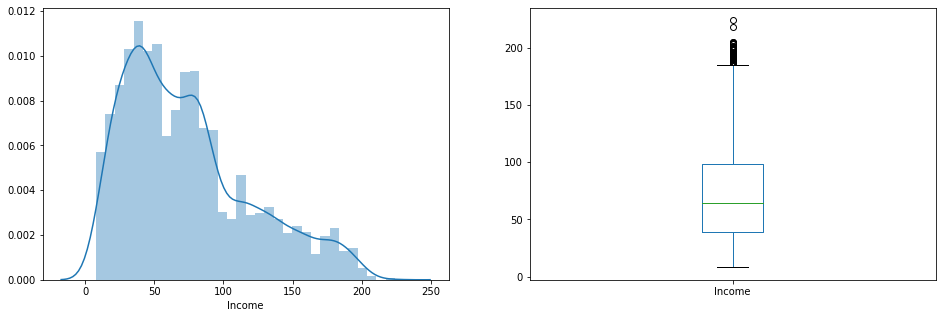

In [7]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Income'])

plt.subplot(122)
df['Income'].plot.box(figsize=(16,5))

Majority of the customers have annual income between 20K USD and 150K USD and there are few outlier customers with very high income.

### Data distribution of ZIP Code

In [8]:
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

we can't use ZIP Code as number because some models use distances and numerical value value of ZIP code does not mean anything.
We also can't use label encoder because there is no order in values of ZIP code.
one hot encoding ZIP CODE will not help since there are many unquie values of ZIP code and it will result in sparse m,atrix and bad model training.
so we will drop ZIP code from our training data. This will help gain better trained models.

### Data distribution of Family

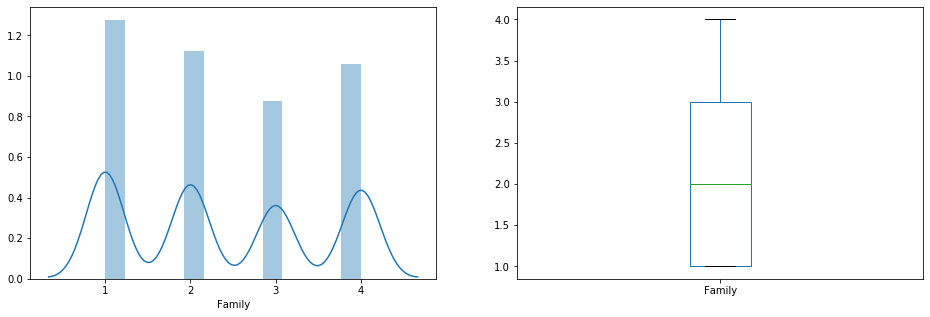

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Family'])

plt.subplot(122)
df['Family'].plot.box(figsize=(16,5))

Looks like customers are almost evenly distributed amongst all size of families.


### Data distribution of CCAvg

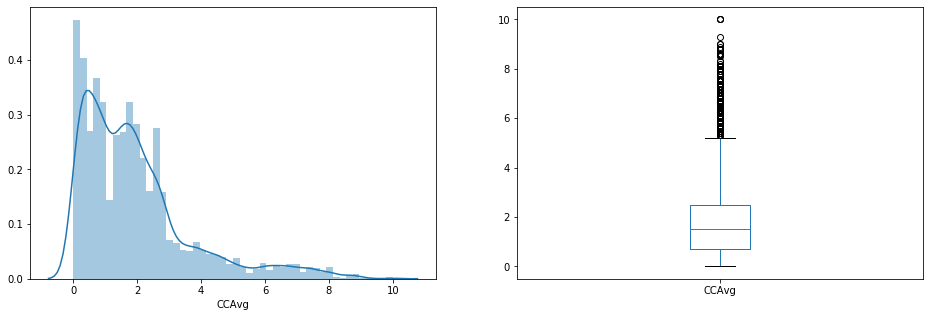

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CCAvg'])

plt.subplot(122)
df['CCAvg'].plot.box(figsize=(16,5))

Majority of the customers have Avg. spending on credit cards per month below 4K USD and there are few outlier customers.

### Data distribution of Education

In [11]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

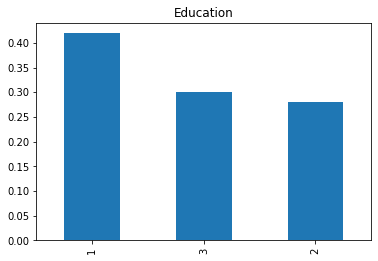

In [12]:
df['Education'].value_counts(normalize=True).plot.bar( title= 'Education')

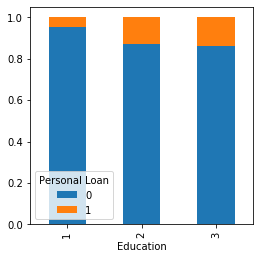

In [13]:
# Distribution of Education Level by Personal Loan.
Education=pd.crosstab(df['Education'],df['Personal Loan'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Customer's are  almost evenly distributed amongst education levels.
customers with higher level of education is more likely to buy personal loan.
distribution shows its good idea to use Education variable as catagorical data in training data.

### Data distribution of Mortgage

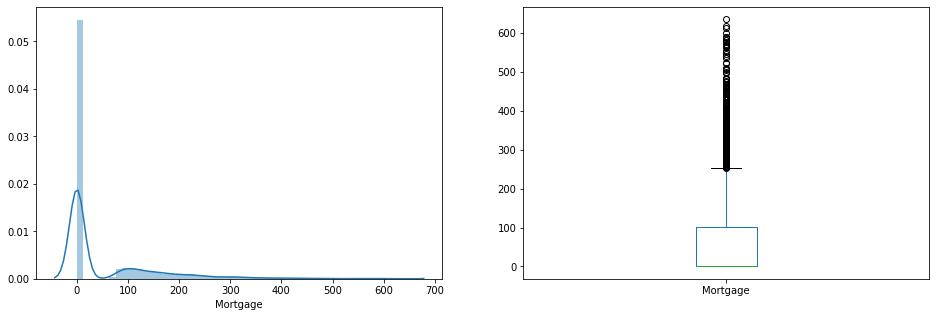

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Mortgage'])

plt.subplot(122)
df['Mortgage'].plot.box(figsize=(16,5))

Only very fer customers have Mortgage for their house

### Data distribution of Securities Account

In [15]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

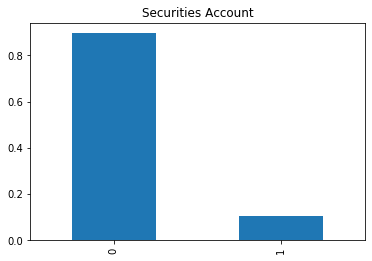

In [16]:
df['Securities Account'].value_counts(normalize=True).plot.bar( title= 'Securities Account')

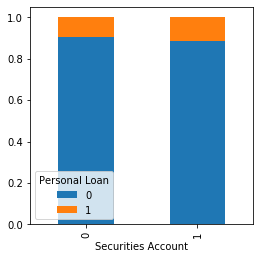

In [17]:
# Distribution of Securities Account Level by Personal Loan.
Securities_Account=pd.crosstab(df['Securities Account'],df['Personal Loan'])
Securities_Account.div(Securities_Account.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Only ~10% of customers have Securities Account with the bank. plot shows having or not having Securities Account does not 
impact customers decision to buy Personal loan much.

### Data distribution of CD Account

In [18]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

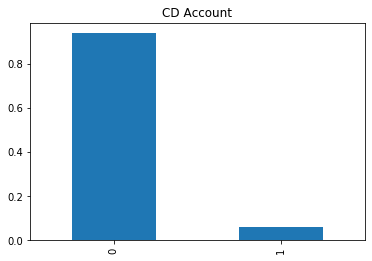

In [19]:
df['CD Account'].value_counts(normalize=True).plot.bar( title= 'CD Account')

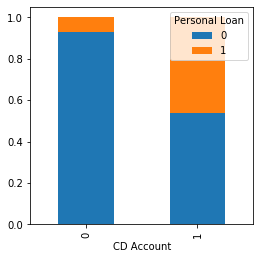

In [20]:
# Distribution of Securities Account Level by Personal Loan.
CD_Account=pd.crosstab(df['CD Account'],df['Personal Loan'])
CD_Account.div(CD_Account.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Only ~6% of customers have CD Account with bank. A customer with CD Account is more likly to buy Personal loan compared to one who don't.

### Data distribution of Online

In [21]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

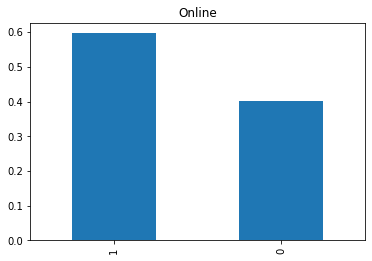

In [22]:
df['Online'].value_counts(normalize=True).plot.bar( title= 'Online')

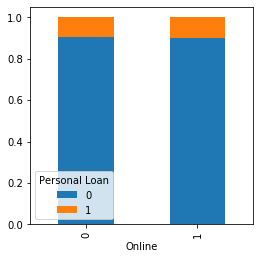

In [23]:
# Distribution of Securities Account Level by Personal Loan.
Online=pd.crosstab(df['Online'],df['Personal Loan'])
Online.div(Online.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Nearly 60% of liability customers usese internet banking facilities. plot shows using or not using internet banking facilitiest doesn't 
impact customers decision to buy Personal loan much.

### Data distribution of CreditCard

In [24]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

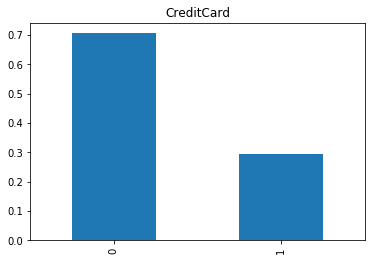

In [25]:
df['CreditCard'].value_counts(normalize=True).plot.bar( title= 'CreditCard')

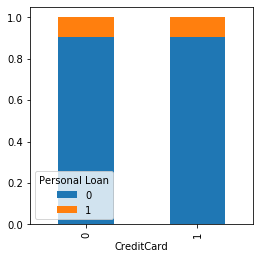

In [26]:
# Distribution of Securities Account Level by Personal Loan.
CreditCard=pd.crosstab(df['CreditCard'],df['Personal Loan'])
CreditCard.div(CreditCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Nearly 70% of liability customers have credit card issued by UniversalBank. plot shows havig or not having credit card doesn't 
impact customers decision to buy Personal loan much.

## Get the target column distribution.

In [27]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

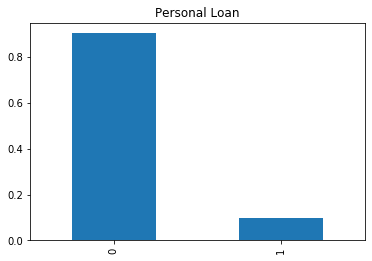

In [28]:
df['Personal Loan'].value_counts(normalize=True).plot.bar( title= 'Personal Loan')

Only 480 in 5000 customers opted for Personal Loan. this shows nearly 9.6% of customers bought the Loan.

## Split the data into training and test set in the ratio of 70:30 respectively

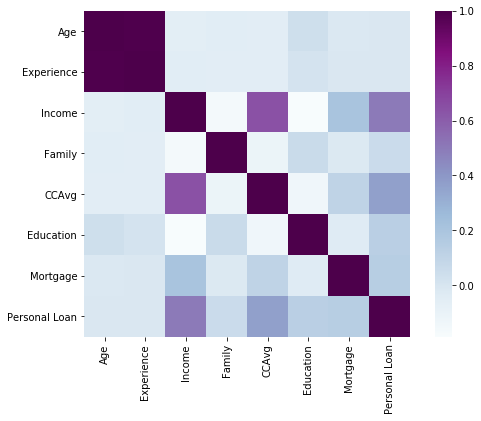

In [29]:
cols = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan']
matrix = df[cols].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, square=True, cmap="BuPu")

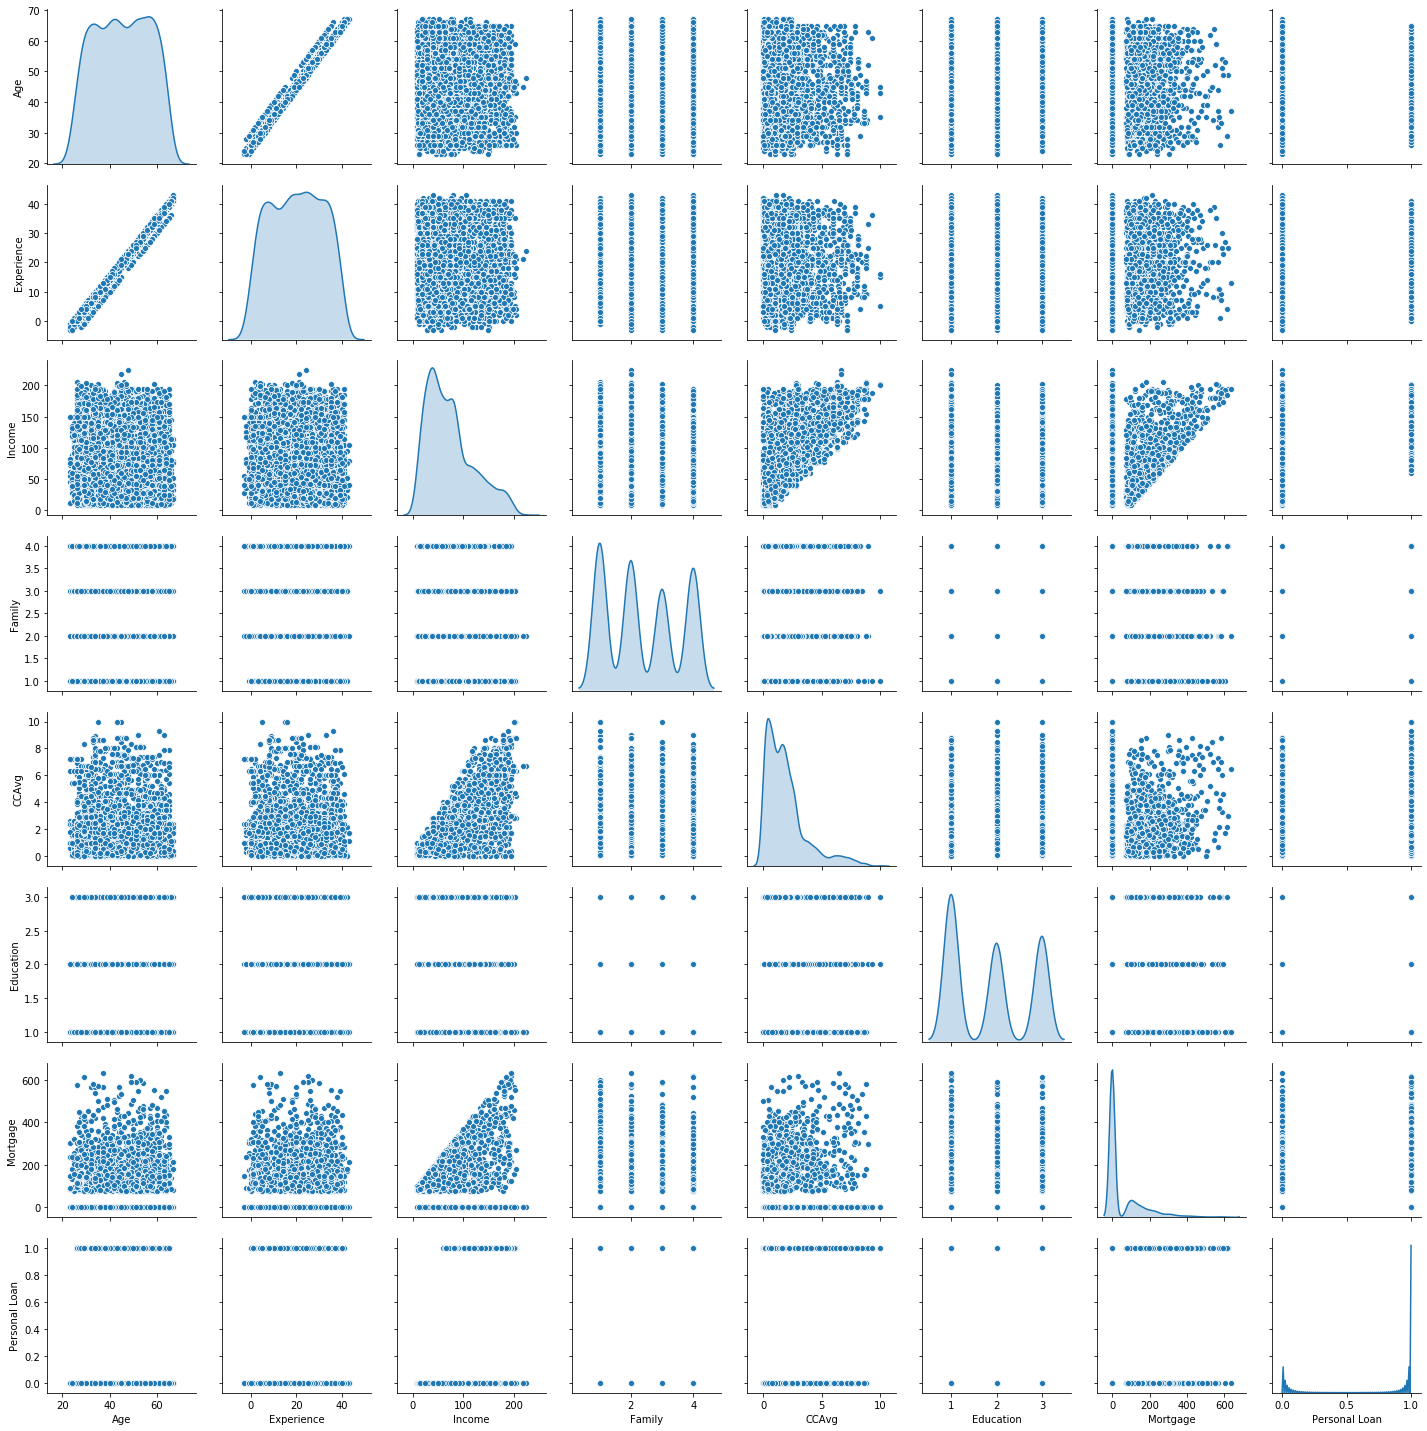

In [30]:
sns.pairplot(df[cols],diag_kind='kde')

heatmap and pairplot shows Age and Experience are hight positively corelated. we might consider droping one of these variables from out attributes to train the model. Income and CCAvg also shoes some positive corelation.

In [31]:
X = df.iloc[:, [1,3,5,6,7,8,10,11,12,13]].values
y = df.iloc[:, 9].values

# One hot encoding values of Level of Education attribute
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,4] = labelencoder_X.fit_transform(X[:,4])
ohe = OneHotEncoder(categorical_features = [4])
X = ohe.fit_transform(X).toarray()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


D:\programX86\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\programX86\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


we droped Expience and ZIP code columns from Training data based on above analysis.

Lets check split of data

In [32]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Peronal Loan buying ratio in split data 

In [33]:
print("Original Loan 1 Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Original Loan 0 Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan 1 Values    : 480 (9.60%)
Original Loan 0 Values   : 4520 (90.40%)

Training Loan 1 Values    : 323 (9.23%)
Training Loan 0 Values   : 3177 (90.77%)

Test Loan 1 Values        : 157 (10.47%)
Test Loan 0 Values       : 1343 (89.53%)



In [34]:
#scale the data since KNN and SVC works woth distances
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

### Fitting data to logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression(solver="liblinear")
LogReg_model.fit(X_train, y_train)

ypred_LogReg = LogReg_model.predict(X_test)

### Fitting data to KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

ypred_KNN = KNN_model.predict(X_test)

### Fitting data to Naive Bayes classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

ypred_NB = NB_model.predict(X_test)

### Fitting data to  SVM classifier

In [38]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'rbf')
SVC_model.fit(X_train, y_train)

ypred_SVC = SVC_model.predict(X_test)

## Print the confusion matrix for all the above models

### Logistic Regression confusion matrix

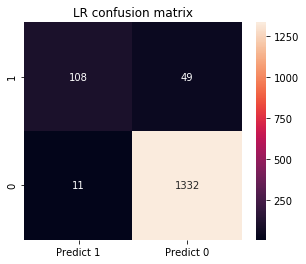

In [39]:
cm= confusion_matrix(y_test, ypred_LogReg, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
ax = plt.axes()
sns.heatmap(df_cm, annot=True, square = True, fmt="d")
ax.set_title('LR confusion matrix')
plt.show()

### KNN Classifier confusion matrix

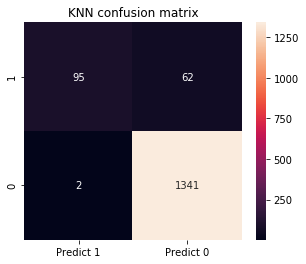

In [40]:
cm= confusion_matrix(y_test, ypred_KNN, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
ax = plt.axes()
sns.heatmap(df_cm, annot=True, square = True, fmt="d")
ax.set_title('KNN confusion matrix')
plt.show()

### Naive Bayes Classifier confusion matrix

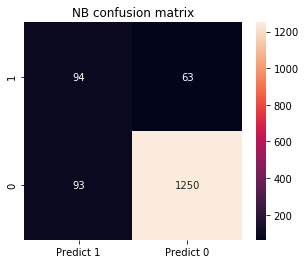

In [41]:
cm= confusion_matrix(y_test, ypred_NB, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
ax = plt.axes()
sns.heatmap(df_cm, annot=True, square = True, fmt="d")
ax.set_title('NB confusion matrix')
plt.show()

### SVC confusion matrix

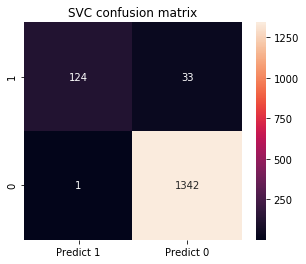

In [42]:
cm= confusion_matrix(y_test, ypred_SVC, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
ax = plt.axes()
sns.heatmap(df_cm, annot=True, square = True, fmt="d")
ax.set_title('SVC confusion matrix')
plt.show()

## Give your reasoning on which is the best model in this case and why it performs better?

### To answer above, first lets compare the accuracy of all four models.

In [43]:
Logreg_score = LogReg_model.score(X_test, y_test)
KNN_score = KNN_model.score(X_test, y_test)
NB_score = NB_model.score(X_test, y_test)
SVC_score = SVC_model.score(X_test, y_test)

print('Model Name \t\t\t Model Accuracy Score')
print( '{:<{}s}'.format('Logistic Regression', 20) + ' \t\t '+ f'{round(Logreg_score,3)}')
print( '{:<{}s}'.format('KNN Classifier', 20) + ' \t\t '+ f'{round(KNN_score,3)}')
print( '{:<{}s}'.format('Naive Bayes Classifier', 20) + ' \t\t '+ f'{round(NB_score,3)}')
print( '{:<{}s}'.format('SVC Classifier', 20) + ' \t\t '+ f'{round(SVC_score,3)}')



Model Name 			 Model Accuracy Score
Logistic Regression  		 0.96
KNN Classifier       		 0.957
Naive Bayes Classifier 		 0.896
SVC Classifier       		 0.977


#### From above we can see that Support Vector Classifier is best model for given data.

#### SVC uses support vectors to classify the data as compared to KNN and LR wich used distance. This data set contains attributes which are not efficiently represrented as distance ( e.g. ZIP Code, Number of family emebers and lot of Binary variables).
#### Naive bayes classifier takes assumption that all attributes fully independent and for attibutes pairplot we can clearly see there is good correlation between attributes ,hence NB is giving the least accuracy score